In [1]:
%matplotlib qt
import hyperspy.api as hs
import numpy as np
import scipy.misc
import scipy
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from PIL import Image
#.........................
import pandas as pd
from openpyxl import Workbook
import skimage
from skimage import io
import cv2
from skimage import measure
from skimage.measure import label
import os
import datetime
from scipy.ndimage import gaussian_filter

import io
from contextlib import redirect_stdout
from scipy.signal import savgol_filter
#.............................

from skimage.measure import regionprops_table
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img
from importlib import reload
import segmenteverygrain as seg
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
from tqdm import trange

from skimage.transform import resize

from scipy.ndimage import zoom
from skimage import exposure, restoration
from skimage import exposure
from scipy import ndimage

import tensorflow as tf
from tensorflow.keras.optimizers import legacy as legacy_optimizers

C:\ProgramData\hyperspy-bundle\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\hyperspy-bundle\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\ProgramData\hyperspy-bundle\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# These are the X-rays Kfactors for the Thermo Fisher spectra 300 TEM at the Italian Institue of Technology at Genova, Italy.

## You may load your TEM's X-rays elements and their respective Kfactors into the 2 variables below (X_ray_Lines ,Kfactor).

### Make sure the x-ray element is labeled similiarly according to the  "X_ray_Lines" array below. order of the elements in the "X_ray_Lines" array must match their respective Kfactors in the "Kfactor" array.


In [2]:
X_ray_Lines=['B_Ka', 'C_Ka', 'N_Ka', 'O_Ka', 'F_Ka', 'Ne_Ka', 'Na_Ka', 'Mg_Ka','Al_Ka', 'Si_Ka', 'P_Ka', 'S_Ka', 'Cl_Ka', 'Cl_Ll', 'Ar_Ka',
       'Ar_Kb1', 'Ar_Ll', 'K_Ka', 'K_Kb1', 'K_Ll', 'Ca_Ka', 'Ca_Ka2','Ca_Kb1', 'Ca_Ll', 'Sc_Ka', 'Sc_Ka2', 'Sc_Kb1', 'Sc_La', 'Sc_Ll',
       'Sc_Ln', 'Ti_Ka', 'Ti_Kb1', 'Ti_La', 'Ti_Lb1', 'Ti_Ll', 'V_Ka','V_Ka2', 'V_Kb1', 'V_La', 'V_La2', 'V_Lb1', 'V_Ll', 'V_Ln',
       'Cr_Ka', 'Cr_Ka2', 'Cr_Kb1', 'Cr_La', 'Cr_La2', 'Cr_Lb1', 'Cr_Ll','Cr_Ln', 'Mn_Ka', 'Mn_Ka2', 'Mn_Kb1', 'Mn_La', 'Mn_La2', 'Mn_Lb1',
       'Mn_Ll', 'Mn_Ln', 'Fe_Ka', 'Fe_Ka2', 'Fe_Kb1', 'Fe_La', 'Fe_La2','Fe_Lb1', 'Fe_Ll', 'Co_Ka', 'Co_Ka2', 'Co_Kb1', 'Co_La', 'Co_La2',
       'Co_Lb1', 'Co_Ll', 'Ni_Ka', 'Ni_Ka2', 'Ni_Kb1', 'Ni_La', 'Ni_La2','Ni_Lb1', 'Ni_Ll', 'Cu_Ka', 'Cu_Ka2', 'Cu_Kb1', 'Cu_La', 'Cu_La2',
       'Cu_Lb1', 'Zn_Ka', 'Zn_Ka2', 'Zn_Kb1', 'Zn_La', 'Zn_La2', 'Zn_Lb1','Ga_Ka', 'Ga_Ka2', 'Ga_Kb1', 'Ga_La', 'Ga_La2', 'Ga_Lb1', 'Ge_Ka',
       'Ge_Ka2', 'Ge_Kb1', 'Ge_La', 'Ge_La2', 'Ge_Lb1', 'As_Ka', 'As_Ka2','As_Kb1', 'As_La', 'As_La2', 'As_Lb1', 'Se_Ka', 'Se_Ka2', 'Se_Kb1',
       'Se_La', 'Se_La2', 'Se_Lb1', 'Br_Ka', 'Br_Ka2', 'Br_Kb1', 'Br_La','Br_La2', 'Br_Lb1', 'Kr_Ka', 'Kr_Ka2', 'Kr_Kb1', 'Kr_La', 'Kr_La2',
       'Kr_Lb1', 'Rb_Ka', 'Rb_Ka2', 'Rb_Kb1', 'Rb_La', 'Rb_La2', 'Rb_Lb1','Sr_Ka', 'Sr_Ka2', 'Sr_Kb1', 'Sr_La', 'Sr_La2', 'Sr_Lb1', 'Y_Ka',
       'Y_Ka2', 'Y_Kb1', 'Y_La', 'Y_La2', 'Y_Lb1', 'Zr_Ka', 'Zr_Ka2','Zr_Kb1', 'Zr_La', 'Zr_La2', 'Zr_Lb1', 'Zr_Mz1', 'Nb_Ka', 'Nb_Ka2',
       'Nb_Kb1', 'Nb_La', 'Nb_La2', 'Nb_Lb1', 'Nb_Mz1', 'Mo_Ka', 'Mo_Ka2','Mo_Kb1', 'Mo_La', 'Mo_La2', 'Mo_Lb1', 'Mo_Mz1', 'Tc_Ka', 'Tc_Ka2',
       'Tc_La', 'Tc_La2', 'Tc_Lb1', 'Tc_Mz1', 'Ru_Ka', 'Ru_Ka2', 'Ru_La','Ru_La2', 'Ru_Lb1', 'Ru_Mz1', 'Rh_La', 'Rh_La2', 'Rh_Lb1',
       'Rh_Mz1', 'Pd_La', 'Pd_La2', 'Pd_Lb1', 'Pd_Mz1', 'Ag_La', 'Ag_La2','Ag_Lb1', 'Ag_Lb2', 'Ag_Mz1', 'Cd_La', 'Cd_La2', 'Cd_Lb1',
       'Cd_Lb2', 'Cd_Mz1', 'In_La', 'In_La2', 'In_Lb1', 'In_Lb2','In_Mz1', 'In_Mg1', 'Sn_La', 'Sn_La2', 'Sn_Lb1', 'Sn_Lb2',
       'Sn_Mz1', 'Sn_Mg1', 'Sb_La', 'Sb_La2', 'Sb_Lb1', 'Sb_Lb2','Sb_Lb3', 'Sb_Mz1', 'Sb_Mg1', 'Te_La', 'Te_La2', 'Te_Lb1',
       'Te_Lb2', 'Te_Mz1', 'Te_Mg1', 'I_La', 'I_La2', 'I_Lb1', 'I_Lb2','I_Lb3', 'I_Mz1', 'I_Mg1', 'Xe_La', 'Xe_La2', 'Xe_Lb1', 'Xe_Lb2',
       'Xe_Lb3', 'Xe_Mz1', 'Xe_Mg1', 'Cs_La', 'Cs_La2', 'Cs_Lb1','Cs_Lb2', 'Cs_Mz1', 'Cs_Mg1', 'Ba_La', 'Ba_Lb1', 'Ba_Lb2',
       'Ba_Lb3', 'Ba_Mz1', 'Ba_Mg1', 'La_La', 'La_La2', 'La_Lb1','La_Lb2', 'La_Lb3', 'La_Mz1', 'La_Mg1', 'Ce_La', 'Ce_La2',
       'Ce_Lb1', 'Ce_Lb2', 'Ce_Lb3', 'Pr_La', 'Pr_La2', 'Pr_Lb1','Pr_Lb2', 'Pr_Lb3', 'Pr_Ma', 'Pr_Mz1', 'Pr_Mg1', 'Nd_La', 'Nd_La2',
       'Nd_Lb1', 'Nd_Lb2', 'Nd_Lb3', 'Nd_Ma', 'Nd_Mb', 'Nd_Mz1', 'Nd_Mg1','Pm_La', 'Pm_La2', 'Pm_Lb1', 'Pm_Lb2', 'Pm_Lb3', 'Pm_Ma', 'Pm_Mb',
       'Pm_Mz1', 'Pm_Mg1', 'Sm_La', 'Sm_La2', 'Sm_Lb1', 'Sm_Lb2', 'Sm_Ma','Sm_Mb', 'Sm_Mz1', 'Eu_La', 'Eu_La2', 'Eu_Lb1', 'Eu_Lb2', 'Eu_Lb3',
       'Eu_Ma', 'Eu_Mb', 'Eu_Mz1', 'Gd_La', 'Gd_La2', 'Gd_Lb1', 'Gd_Lb2','Gd_Lb3', 'Gd_Ma', 'Gd_Mb', 'Gd_Mz1', 'Tb_La', 'Tb_La2', 'Tb_Lb1',
       'Tb_Lb2', 'Tb_Lb3', 'Tb_Ma', 'Tb_Mb', 'Tb_Mz1', 'Dy_La', 'Dy_La2','Dy_Lb1', 'Dy_Lb2', 'Dy_Lb3', 'Dy_Ma', 'Dy_Mb', 'Dy_Mz1', 'Ho_La',
       'Ho_La2', 'Ho_Lb1', 'Ho_Lb2', 'Ho_Ma', 'Ho_Mb', 'Ho_Mz1', 'Er_La','Er_La2', 'Er_Lb1', 'Er_Lb2', 'Er_Ma', 'Er_Mb', 'Er_Mz1', 'Tm_La',
       'Tm_La2', 'Tm_Lb1', 'Tm_Lb2', 'Tm_Ma', 'Tm_Mb', 'Tm_Mz1', 'Yb_La','Yb_La2', 'Yb_Lb1', 'Yb_Lb2', 'Yb_Ma', 'Yb_Mb', 'Yb_Mz1', 'Lu_La',
       'Lu_La2', 'Lu_Lb1', 'Lu_Lb2', 'Lu_Ma', 'Lu_Mb', 'Hf_La', 'Hf_La2','Hf_Lb1', 'Hf_Lb2', 'Hf_Ma', 'Hf_Mb', 'Hf_Na', 'Ta_La', 'Ta_La2',
       'Ta_Lb1', 'Ta_Lb2', 'Ta_Ma', 'Ta_Mb', 'Ta_Na', 'W_La', 'W_La2','W_Lb1', 'W_Lb2', 'W_Lb3', 'W_Ma', 'W_Mb', 'W_Na', 'Re_La',
       'Re_La2', 'Re_Lb1', 'Re_Lb2', 'Re_Ma', 'Re_Mb', 'Os_La', 'Os_La2','Os_Lb1', 'Os_Lb2', 'Os_Ma', 'Os_Mb', 'Ir_La', 'Ir_La2', 'Ir_Lb1',
       'Ir_Lb2', 'Ir_Ma', 'Ir_Mb', 'Ir_Na', 'Pt_La', 'Pt_La2', 'Pt_Lb1','Pt_Lb2', 'Pt_Ma', 'Pt_Mb', 'Pt_Na', 'Au_La', 'Au_La2', 'Au_Lb1',
       'Au_Lb2', 'Au_Ma', 'Au_Mb', 'Au_Na', 'Hg_La', 'Hg_La2', 'Hg_Lb1','Hg_Lb2', 'Hg_Ma', 'Hg_Mb', 'Hg_Na', 'Tl_La', 'Tl_La2', 'Tl_Lb1',
       'Tl_Lb2', 'Tl_Ma', 'Tl_Mb', 'Pb_La', 'Pb_La2', 'Pb_Lb1', 'Pb_Lb2','Pb_Ma', 'Pb_Mb', 'Pb_Na', 'Bi_La', 'Bi_La2', 'Bi_Lb1', 'Bi_Lb2',
       'Bi_Ma', 'Bi_Mb', 'Bi_Na', 'Po_La', 'Po_La2', 'Po_Lb1', 'Po_Lb2','Po_Ma', 'Po_Mb', 'At_La', 'At_La2', 'At_Lb1', 'At_Lb2', 'At_Ma',
       'At_Mb', 'Rn_La', 'Rn_La2', 'Rn_Lb1', 'Rn_Lb2', 'Rn_Ma', 'Rn_Mb','Fr_La', 'Fr_La2', 'Fr_Lb1', 'Fr_Lb2', 'Fr_Ma', 'Fr_Mb', 'Ra_La',
       'Ra_La2', 'Ra_Lb1', 'Ra_Lb2', 'Ra_Ma', 'Ra_Mb', 'Ac_La', 'Ac_La2','Ac_Lb1', 'Ac_Lb2', 'Ac_Ma', 'Ac_Mb', 'Th_La', 'Th_La2', 'Th_Lb1',
       'Th_Lb2', 'Th_Ma', 'Th_Mb', 'Pa_La', 'Pa_La2', 'Pa_Lb1', 'Pa_Lb2','Pa_Ma', 'Pa_Mb', 'U_La', 'U_La2', 'U_Lb1', 'U_Lb2', 'U_Ma',
       'U_Mb', 'Np_La', 'Np_La2', 'Np_Lb1', 'Np_Lb2', 'Np_Ma', 'Np_Mb','Pu_La', 'Pu_La2', 'Pu_Lb1', 'Pu_Lb2', 'Pu_Ma', 'Pu_Mb', 'Am_La',
       'Am_La2', 'Am_Lb1', 'Am_Lb2', 'Am_Ma', 'Am_Mb', 'Cm_La', 'Cm_La2','Cm_Lb1', 'Cm_Lb2', 'Cm_Ma', 'Cm_Mb']

#------------------------------------------------------------------------------------------------------------------------------------------

Kfactor=[1.   , 0.533068, 0.420808, 0.368355, 0.380383, 0.341269,     
       0.339336, 0.320986, 0.322988, 0.316302, 0.324707, 0.311622,0.1535, 4.81173 , 0.345273, 0.345273, 3.35253 , 0.323166,
       0.323166, 2.26316 , 0.319417, 0.319417, 0.319417, 1.73267 ,0.347897, 0.347897, 0.347897, 1.62018 , 1.62018 , 1.64107 ,
       0.361616, 0.361616, 1.28969 , 1.30932 , 1.28969 , 0.378259,0.378259, 0.378259, 1.14526 , 1.14526 , 1.16492 , 1.14526 ,
       1.16492 , 0.381934, 0.381934, 0.381934, 1.0421  , 1.0421  ,1.06148 , 1.0421  , 1.06148 , 0.401635, 0.401635, 0.401635,
       0.983488, 0.983488, 1.00334 , 0.983488, 1.00334 , 0.408464,0.408464, 0.408464, 0.865526, 0.865526, 0.884075, 0.865526,
       0.433461, 0.433461, 0.433461, 0.803218, 0.803218, 0.821325,0.803218, 0.436503, 0.436503, 0.436503, 0.715041, 0.715041,
       0.731919, 0.715041, 0.480348, 0.480348, 0.480348, 0.695614,0.695614, 0.713092, 0.506509, 0.506509, 0.506509, 0.655666,
       0.655666, 0.673172, 0.558308, 0.558308, 0.558308, 0.646254,0.646254, 0.664671, 0.608356, 0.608356, 0.608356, 0.627112,
       0.627112, 0.646103, 0.665223, 0.665223, 0.665223, 0.604652,0.604652, 0.623921, 0.754646, 0.754646, 0.754646, 0.599529,
       0.599529, 0.619617, 0.832812, 0.832812, 0.832812, 0.571584,0.571584, 0.59188 , 0.965611, 0.965611, 0.965611, 0.584612,
       0.584612, 0.606461, 1.10106 , 1.10106 , 1.10106 , 0.565575,0.565575, 0.587956, 1.27515 , 1.27515 , 1.27515 , 0.554099,
       0.554099, 0.577196, 1.47458 , 1.47458 , 1.47458 , 0.542072,0.542072, 0.565807, 1.73499 , 1.73499 , 1.73499 , 0.529932,
       0.529932, 0.55427 , 0.862048, 2.03545 , 2.03545 , 2.03545 ,0.514809, 0.514809, 0.539611, 0.723484, 2.42434 , 2.42434 ,
       2.42434 , 0.509066, 0.509066, 0.534819, 0.615923, 2.89477 ,2.89477 , 0.4998  , 0.4998  , 0.526256, 0.546105, 3.47579 ,
       3.47579 , 0.49646 , 0.49646 , 0.524025, 0.503898, 0.487992,0.487992, 0.5163  , 0.465148, 0.48788 , 0.48788 , 0.517511,
       0.442626, 0.479682, 0.479682, 0.510088, 0.479682, 0.427516,0.486415, 0.486415, 0.518565, 0.486415, 0.422636, 0.48434 ,
       0.48434 , 0.517735, 0.48434 , 0.41457 , 0.649659, 0.489136,0.489136, 0.524236, 0.489136, 0.417419, 0.641571, 0.490736,
       0.490736, 0.527391, 0.490736, 0.5752  , 0.417214, 0.630288,0.503862, 0.503862, 0.54302 , 0.503862, 0.427584, 0.635616,
       0.491814, 0.491814, 0.531615, 0.491814, 0.577809, 0.417312,0.610426, 0.500606, 0.500606, 0.542794, 0.500606, 0.589496,# Cs modified to 0.410092
       0.462919, 0.667151, 0.499092, 0.499092, 0.542586, 0.499092,0.458534, 0.651025, 0.508506, 0.554503, 0.508506, 0.600005,
       0.460682, 0.646076, 0.507271, 0.507271, 0.554962, 0.507271,0.599792, 0.451586, 0.627924, 0.505229, 0.505229, 0.554532,
       0.505229, 0.598454, 0.501721, 0.501721, 0.552602, 0.501721,0.59566 , 0.431322, 0.442269, 0.605744, 0.507534, 0.507534,
       0.561023, 0.507534, 0.604079, 0.404205, 0.414815, 0.414815,0.564254, 0.505075, 0.505075, 0.560358, 0.505075, 0.602755,
       0.392087, 0.40316 , 0.40316 , 0.544828, 0.519108, 0.519108,0.578071, 0.519108, 0.393666, 0.404766, 0.404766, 0.520447,
       0.520447, 0.581783, 0.520447, 0.624438, 0.383801, 0.395719,0.395719, 0.534834, 0.534834, 0.600218, 0.534834, 0.6436  ,
       0.384122, 0.396402, 0.396402, 0.537418, 0.537418, 0.605552,0.537418, 0.648765, 0.375877, 0.388012, 0.388012, 0.550717,
       0.550717, 0.623096, 0.550717, 0.666782, 0.370072, 0.38283 ,0.38283 , 0.553048, 0.553048, 0.628405, 0.553048, 0.363694,
       0.376524, 0.376524, 0.559494, 0.559494, 0.638531, 0.559494,0.356405, 0.369653, 0.369653, 0.564334, 0.564334, 0.646932,
       0.564334, 0.347762, 0.361009, 0.361009, 0.577853, 0.577853,0.665435, 0.577853, 0.347018, 0.360166, 0.360166, 0.585015,
       0.585015, 0.676867, 0.585015, 0.34564 , 0.358875, 0.600134,0.600134, 0.697658, 0.600134, 0.34291 , 0.356419, 4.52148 ,
       0.612021, 0.612021, 0.714794, 0.612021, 0.337683, 0.351235,4.34329 , 0.627664, 0.627664, 0.736723, 0.627664, 0.783503,
       0.332903, 0.346685, 4.27957 , 0.640178, 0.640178, 0.75525 ,0.640178, 0.329277, 0.343151, 0.661883, 0.661883, 0.78492 ,
       0.661883, 0.327475, 0.341694, 0.679373, 0.679373, 0.809868,0.679373, 0.321135, 0.335498, 3.94523 , 0.703891, 0.703891,
       0.843626, 0.703891, 0.316368, 0.330824, 3.88103 , 0.726478,0.726478, 0.875574, 0.726478, 0.31009 , 0.324606, 3.81794 ,
       0.754054, 0.754054, 0.913837, 0.754054, 0.307118, 0.321702,3.83421 , 0.788205, 0.788205, 0.960618, 0.788205, 0.304815,
       0.319637, 0.824215, 0.824215, 1.01061 , 0.824215, 0.300778,0.315721, 3.94573 , 0.855891, 0.855891, 1.05571 , 0.855891,
       0.295252, 0.310289, 3.95049 , 0.884452, 0.884452, 1.09788 ,0.884452, 0.287961, 0.303   , 0.922501, 0.922501, 1.1522  ,
       0.922501, 0.281989, 0.297055, 1.0145  , 1.0145  , 1.27504 ,1.0145  , 0.290529, 0.306378, 1.06296 , 1.06296 , 1.34493 ,
       1.06296 , 0.284384, 0.300225, 1.12582 , 1.12582 , 1.43428 ,1.12582 , 0.280508, 0.296402, 1.1852  , 1.1852  , 1.52042 ,
       1.1852  , 0.274754, 0.290601, 1.27186 , 1.27186 , 1.64329 ,1.27186 , 0.273692, 0.289734, 1.332   , 1.332   , 1.73348 ,
       1.332   , 0.265051, 0.281119, 1.44519 , 1.44519 , 1.89542 ,1.44519 , 0.265469, 0.281685, 1.5186  , 1.5186  , 2.00721 ,
       1.5186  , 0.25749 , 0.273529, 1.65206 , 1.65206 , 2.20108 ,1.65206 , 0.257837, 0.274195, 1.74111 , 1.74111 , 2.33883 ,
       1.74111 , 0.249731, 0.265923, 1.87651 , 1.87651 , 2.54239 ,1.87651 , 0.246877, 0.263823]

# Ensure the lengths of both array match

In [3]:
len(X_ray_Lines)

519

In [4]:
len(Kfactor)

519

# Load the segmentation algorithm

In [7]:
model = seg.Unet()
model.compile(optimizer=legacy_optimizers.Adam(), loss=seg.weighted_crossentropy, metrics=["accuracy"])
model.load_weights('./checkpoints/seg_model')
#the SAM model checkpoints can be downloaded from: https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
sam = sam_model_registry["default"](checkpoint="./sam_vit_h_4b8939.pth")

In [8]:
# set this to FALSE if you dont want to use the principal component analysis 
PCA_= False  

# this is the value of the variance to ber considered ranging between 0 and 1 , for higher noise filtering set this to lower value based on the scree plot
PCA_explained_variance= 0.9 

# Start loading and processing the STEM data

In [11]:
samplei=0
# Specify the directory path
directory = os.getcwd()

# Get a list of files in the directory
file_list = os.listdir(directory)

# Filter files with the .emd or .bcf extension, you may add your file extension here if it is different.
emd_files = [file for file in file_list if file.endswith(".emd") or file.endswith(".bcf")]
intitial_k=[]
dynamic_K=[]

# Load and process the .emd files using Hyperspy
for file in emd_files:
    # Construct the full file path
    file_path = os.path.join(directory, file)
    
    # Load the file using Hyperspy
    SI = hs.load(file_path)  

    # Split the string based on the '.' delimiter
    name = file.split('.')[0]

    # Print the resulting string without the extension
    #print(filename_without_extension)
    #SI = hs.load(name+".emd")

    for i in range(len(SI)):
        if SI[i].metadata.General.title == 'HAADF':
                              HAADF = SI[i]
                              HAADFindex = i
        #if SI[i].metadata.General.title == 'EDS':
        if SI[i].metadata.General.title in ("EDS", "EDX"):
        # Check for 3D data by examining dimensions
            if SI[i].data.ndim == 3:  # Ensure it has three dimensions
                EDS = SI[i]
                EDSindex = i
    if SI[i].data.ndim != 3: 
        print("EDX is not 3 dimensional data set, check that EDX map is 3D, the code cant mask the HAADF image with EDX map in this case")
                    
                    

    #Print the extracted values
    print("Sample name:", name)
    #print("file: "+file_path+"\n")
    print("HAADF index:", HAADFindex)
    print("EDX index:", EDSindex)
    print("------------------------------------------------------")

    EDS.change_dtype("float32")
    EDS = EDS.rebin(new_shape=(EDS.data.shape[1], EDS.data.shape[0], 1024))
    
    #-------------------------------------------------------------------------------------------------
    # your HAADF image or EDX map might need rebinning for the SEG alghorithm or the PCA  denoising.
    #if you want to apply PCA check manually the result of the PCA components, if you are going to rebin, make sure both HAADF and EDX are rebinned with similar dimensions. 
    #HAADF=HAADF.rebin([226,238])
    #EDS=EDS.rebin([226,238,1024])
    #-------------------------------------------------------------------------------------------------


    if PCA_==True:
        print("Principal component analysis (PCA) denoising is selected: \n")

        EDS.decomposition(True)

        #EDS.plot_decomposition_results()
        #EDS.plot_explained_variance_ratio()

        # Example sorted array in descending order
        explained_variance = np.array(EDS.get_explained_variance_ratio())

        # Initialize cumulative sum and count
        cumulative_sum = 0.0
        components = 0

        # Iterate through the sorted array and sum the elements until cumulative_sum reaches or exceeds 0.9
        for value in explained_variance:
            cumulative_sum += value
            components += 1
            if cumulative_sum >= PCA_explained_variance:
                break
        print("")
        print('Number of components accounting for '+ str(PCA_explained_variance) +' of the total variance are : '+ str(components)+', these components will be used in rebuilding the EDX signal')
        
        EDS=EDS.get_decomposition_model(components)

    else:
        print("Principal component analysis (PCA) denoising is not selected")
    print("------------------------------------------------------")
#_______________________________________________________________________________  
    print("removing any peak at 0eV and cropping the x-axes before the 0 if it exist \n")

# make sure the EDX energy axes starts at 0eV, and remove any peak at the 0eV
    EDS.crop(axis=2,start=0.0)

    eds_signal = EDS

        # Access the data and axes
    data = eds_signal.data
    energy_axis = eds_signal.axes_manager[2]

        # Get the energy values from the axis
    energy_values = energy_axis.axis

        # Adjust energy values to start from 0
    adjusted_energy_values = energy_values - energy_values.min()

        # Debug: Print the first few adjusted energy values to verify
        #print("Adjusted energy values (first 20):", adjusted_energy_values[:20])

        # Find the indices corresponding to the energy range 0-100 eV
    start_index = np.searchsorted(adjusted_energy_values, 0.0)  # First index where energy >= 0 eV
    end_index = np.searchsorted(adjusted_energy_values, 0.13)  # First index where energy >= 100 eV

        # Print the indices to verify
    if int(i)<<1:
            #print(f"Start index: {start_index}, End index: {end_index}")
            print(f"The EDX counts between {adjusted_energy_values[start_index]} eV and {adjusted_energy_values[end_index-1]} eV is set to 0 (removed any peak at 0eV)")

        # Ensure the indices are valid and in the correct range
    if start_index < end_index:
            # Set the values in that range to 0
            data[..., start_index:end_index] = 0

            # Update the EDS signal with the modified data
            eds_signal.data = data

            # Save the modified EDS signal if necessary

            # Optionally, plot the modified EDS signal to verify the changes
            #eds_signal.plot(True)
    else:
            print("Error: Invalid indices range.")
#_______________________________________________________________________________________________________ 

    reload(seg)

    zf=1
    z=0
    up=0
    down=0
    highest_counts=0
    iteration=1
    triggerz=0
    bestzf=1
    bestlabel=[]
    best_img=[]

    while z==0:
        image1=np.array(HAADF)
        big_im_with_axis = np.expand_dims(image1, axis=2)
        image2 = np.tile(big_im_with_axis, (1, 1, 3))
        image = (image2 - np.min(image2)) / (np.max(image2) - np.min(image2)) * 255
        big_im = image.astype(np.uint8)
    
    
    
# Determine the zoom factors for each axis
        zoom_factors = (zf,zf, 1)
# Zoom the loaded image array
        big_im = zoom(big_im, zoom_factors)

        big_im_pred = seg.predict_big_image(big_im, model, I=256)
# decreasing the 'dbs_max_dist' parameter results in more SAM prompts:
        labels, grains, coords = seg.label_grains(big_im, big_im_pred, dbs_max_dist=0.1)#10.0  #0.01
        all_grains, labels, mask_all, fig, ax = seg.sam_segmentation(sam, big_im, big_im_pred, coords, labels)

# count the number of particles:
        img_data = labels

# Label connected regions
        labeled_image, num_labels = measure.label(img_data, return_num=True)

 
        pixel_size = HAADF.axes_manager[0].scale

# Load binary .tif file as a Hyperspy signal
        img = labeled_image

# Convert to numpy array
        img_data = img#.data

# Label connected regions
        labeled_image, num_labels = measure.label(img_data, return_num=True)
#labeled_image = measure.label(img)



# Count the number of particles in the labeled image
        particle_count = labeled_image.max()
    
        if particle_count>highest_counts:
            highest_counts=particle_count
            bestlabel=labels
            best_img=img


# Print the result
        print("Number of nanocrystals: "+ str(particle_count)+"\n"+
             f"The pixel size is {pixel_size} nanometer")


# Use scikit-image to label each connected component in the image with a unique integer
        label_img = measure.label(img)#.data

# Extract properties of the labeled regions
        props = measure.regionprops(label_img)
      
        
# Add the labels to the image
        sizes=[]
        pixel_sizes=[]
        region_area_pixels=[]
        
        for i, prop in enumerate(props):
    # Get the centroid of the region
            y, x = prop.centroid

            sizes.append(np.sqrt(prop.area)*pixel_size)
            region_area_pixels.append(prop.area)
    
        region_average_size=np.mean(region_area_pixels)
        # Get the dimensions of the image
        height, width = HAADF.axes_manager.signal_shape

    # Calculate the image size in pixels
        image_size_pixels = height * width
        print("region_average_size: ",region_average_size) 
        print("Image size in pixels:", image_size_pixels)
        if region_average_size=='nan':
            region_average_size=0
            print("region_average_size is set to 0: ",region_average_size)  

#________________________________________________________________________________________
        if (region_average_size/image_size_pixels)*100>1.3:#<<< if the average NCs size takes more than 1.3% of the total HAADF pixels
            print((region_average_size/image_size_pixels)*100)
            zf=0.95
            print("HAADF zoom factor is set to: ",zf)
            zoom_factors = (zf,zf, 1)

    # Zoom the loaded image array
            big_im = zoom(big_im, zoom_factors)
            big_im_pred = seg.predict_big_image(big_im, model, I=256)
    # decreasing the 'dbs_max_dist' parameter results in more SAM prompts:
            labels, grains, coords = seg.label_grains(big_im, big_im_pred, dbs_max_dist=0.01)#10.0  #0.01
            all_grains, labels, mask_all, fig, ax = seg.sam_segmentation(sam, big_im, big_im_pred, coords, labels)
    # count the number of particles:
            img_data = labels
    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)

            pixel_size = HAADF.axes_manager[0].scale

    # Load binary .tif file as a Hyperspy signal
            img = labeled_image

    # Convert to numpy array
            img_data = img#.data

    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)
    #labeled_image = measure.label(img)
    # Count the number of particles in the labeled image
            particle_count = labeled_image.max()

            print("Number of nanocrystals: "+ str(particle_count)+"\n"+
                 f"The pixel size is {pixel_size} nanometer")


            if particle_count>highest_counts:
                highest_counts=particle_count
                bestzf=zf
                bestlabel=labels
                best_img=img

                print("new mask will be used with regions count of: ",highest_counts )
            else:
                print("old mask will be used with regions count of: ",highest_counts )

            print("Done")
            z=1
    #________________________________________________________________________________________
        elif 0.5<=(region_average_size/image_size_pixels)*100<=1.3:
            print((region_average_size/image_size_pixels)*100)
            print("HAADF zoom factor is kept at: ",zf)
            z=1
    #______________________________________________________________________________________
        elif 0.3<(region_average_size/image_size_pixels)*100<0.5:
            print((region_average_size/image_size_pixels)*100)
            zf=1.3
            print("HAADF zoom factor is set to: ",zf)
            zoom_factors = (zf,zf, 1)
    # Zoom the loaded image array
            big_im = zoom(big_im, zoom_factors)
            big_im_pred = seg.predict_big_image(big_im, model, I=256)
    # decreasing the 'dbs_max_dist' parameter results in more SAM prompts:
            labels, grains, coords = seg.label_grains(big_im, big_im_pred, dbs_max_dist=0.01)
            all_grains, labels, mask_all, fig, ax = seg.sam_segmentation(sam, big_im, big_im_pred, coords, labels)
    # count the number of particles:
            img_data = labels
    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)


            pixel_size = HAADF.axes_manager[0].scale

    # Load binary .tif file as a Hyperspy signal
            img = labeled_image

    # Convert to numpy array
            img_data = img

    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)
    # Count the number of particles in the labeled image
            particle_count = labeled_image.max()
            print("Number of nanocrystals: "+ str(particle_count)+"\n"+
                 f"The pixel size is {pixel_size} nanometer")


            if particle_count>highest_counts:
                highest_counts=particle_count
                bestzf=zf
                bestlabel=labels
                print("new mask will be used with regions count of: ",highest_counts )
            else:
                print("old mask will be used with regions count of: ",highest_counts )

            print("Done")
            z=1
    #________________________________________________________________________________________
        elif (region_average_size/image_size_pixels)*100<=0.3:
            print((region_average_size/image_size_pixels)*100)
            zf=1.5
            print("HAADF zoom factor is set to: ",zf)
            zoom_factors = (zf,zf, 1)
    # Zoom the loaded image array
            big_im = zoom(big_im, zoom_factors)
            big_im_pred = seg.predict_big_image(big_im, model, I=256)
    # decreasing the 'dbs_max_dist' parameter results in more SAM prompts:
            labels, grains, coords = seg.label_grains(big_im, big_im_pred, dbs_max_dist=0.01)#10.0  #0.01
            all_grains, labels, mask_all, fig, ax = seg.sam_segmentation(sam, big_im, big_im_pred, coords, labels)
    # count the number of particles:
            img_data = labels
    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)


            pixel_size = HAADF.axes_manager[0].scale

    # Load binary .tif file as a Hyperspy signal
            img = labeled_image

    # Convert to numpy array
            img_data = img

    # Label connected regions
            labeled_image, num_labels = measure.label(img_data, return_num=True)
    # Count the number of particles in the labeled image
            particle_count = labeled_image.max()

            print("Number of nanocrystals: "+ str(particle_count)+"\n"+
                 f"The pixel size is {pixel_size} nanometer")

            if particle_count>highest_counts:
                highest_counts=particle_count
                bestzf=zf
                bestlabel=labels
                best_img=img

                print("new mask will be used with regions count of: ",highest_counts )
            else:
                print("old mask will be used with regions count of: ",highest_counts )

            print("Done")
            z=1
            
            
        img_data = bestlabel
        img      = best_img

    # Label connected regions
        labeled_image, num_labels = measure.label(img_data, return_num=True)

    # Use scikit-image to label each connected component in the image with a unique integer
        label_img = measure.label(img) 

    # Extract properties of the labeled regions
        props = measure.regionprops(label_img)
#..........................................................................      
        
#.....................................................................
    roi = []
    regions = []
    image_shape = HAADF.data.shape
# Print the shape
    print("Image shape:", image_shape)
# Loop through the labeled regions
    for i, prop in enumerate(props):
    # Create a new image for the current region
        region_img = np.zeros_like(img)
        mask = np.where(label_img == prop.label, 1, 0)
        region_img[mask.astype(bool)] = img[mask.astype(bool)]#.data

        labels_array = np.array(region_img)
# Resize the array to the specified shape, preserving the range
        resized_roi = resize(labels_array, image_shape, preserve_range=True)
    # Append the new image to the list of regions
        regions.append(resized_roi)
        signals1 = hs.signals.Signal2D(regions[i])#.astype(np.uint8)
        signals = hs.signals.Signal2D((signals1 > 0).data.astype(int))
        roi.append(signals.T)
    print("number of regions: ",len(roi))
 #plot the 3rd region for example
    #plt.title("Region: 3")
    #plt.imshow(roi[3])

#-----------------------------------------------------------------------------------
# Add the labels to the image
    sizes=[]
    pixel_sizes=[]
    for i, prop in enumerate(props):
        
        props1 = measure.regionprops(np.array(roi[i]))
    # Get the centroid of the region
        y, x = prop.centroid
    # Add the label to the image
       # plt.text(x, y, str(i), color="r", fontsize=7)
                   #prop.area
        #sizes.append(np.sqrt(prop.area)*pixel_size)
        sizes.append(np.sqrt(props1[0].area)*pixel_size)
        pixel_sizes.append(pixel_size)
        
# Display the result
    #plt.title("Number of nanocrystals: "+ str(particle_count)+"\n"+
     #    f"The pixel size is {pixel_size} micrometer")
     #plt.imshow(label_img)
    #label_img.save("haadfs binary image regions.tif")  
    #print("no mismatch here at sizes")
#----------------------------------------------------------------------------------------------------------------
    eds_spectrum=EDS
    xx=[]
    HAADF_signal=[]
    EDS_signal=[]
    for i, prop in enumerate(props):
    #for i in range(0,1 ):
        mask= roi[i]
    # Apply the mask flag by direct multiplication
        masked_HAADF = HAADF * mask.T

        masked_spectrum = eds_spectrum * mask
        #masked_HAADF = HAADF * mask.T

       # print("mismatch could be here at masked_spectrum: ",i)
        EDS_signal1= int(masked_spectrum.data.sum())
        EDS_signal.append(EDS_signal1)    
    # Optional: visualize the masked spectrum
        s = masked_spectrum.sum()
        xx.append(s) 
        HAADF_signal1=HAADF*mask.T
        HAADF_signal.append(HAADF_signal1.data.sum())
        #print(HAADF_signal[i])
        
        
        
        
    
    table=""
    f=""
    elements=[]
    C=[]
    halide_Cl =[]
    Cs=[]
    halide_I=[]
    O=[]
    Pb_La=[]
    warning=[]
    warningissue=[]
    regions=[]
    k=0
    kfactors=[]
    Cl_Ka=100
    I_La=100
    Pb_La=100
    no_warning=0
    skipped=[]
    found=[]
    
    
    m =xx[0].create_model()
    m.remove("background_order_6")
    for i in range(0, len(m.get_lines_intensity())): 
        variable_name = f"elements_{i}"
        locals()[variable_name]=[]
        element = m.get_lines_intensity()[i].metadata.General.title.split(' ')[2]
        elements.append(element)
#.......................................................................... 
#..........................................................................        

    print("Initial lines:",elements)
        # Priority mapping, higher number means higher priority
    priority = {'Ka': 3, 'La': 2, 'Ma': 1}

        # Dictionary to hold the highest priority lines for each element
    highest_priority_lines = {}

        # List to track removed lines for reporting
    removed_lines = []
    removed_Xlines= []
    for line in elements:
            element = line.split('_')[0]
            line_type = line.split('_')[1]

            if element in highest_priority_lines:
                # Compare priorities and update if current line has higher priority
                current_priority = priority[line_type]
                existing_line = highest_priority_lines[element]
                existing_priority = priority[existing_line.split('_')[1]]
                if current_priority > existing_priority:
                    highest_priority_lines[element] = line
                    removed_lines.append(f"{existing_line} removed and {line} was kept")
                    removed_Xlines.append(existing_line)

                elif current_priority < existing_priority:
                    # Current line has lower priority and is not added, so it's effectively removed
                    removed_lines.append(f"{line} removed and {existing_line} was kept")
                    removed_Xlines.append(line)

            else:
                # Add the new element with its line
                highest_priority_lines[element] = line

        # Extract the values which are the lines with the highest energy
    elements = list(highest_priority_lines.values())

    print("Final lines kept:  ", elements)
        #print("Changes made:")
    for change in removed_lines:
        print(change) 
    print("")
#..........................................................................        
#..........................................................................        
    for i in range (len(elements)):
        v=0
        for r in range (len(X_ray_Lines)): 
            if v==0: 
                    if elements[i] == X_ray_Lines[r]:        
                        kfactors.append(Kfactor[r])
                        print('kfactor found of:'+str(X_ray_Lines[r])+" == "+str(Kfactor[r]))
                        v=1
       


 #index of halide elements are stored for warning trigger detection later in the code, if one of these 3 elements is not in the data,this part will be ignored.
        if elements[i] == "Cl_Ka":
            Cl_Ka=i



        elif elements[i] == "I_La":
             I_La=i



        elif elements[i] == "Pb_La":
            Pb_La=i
                        

    print("")

    if Cl_Ka or I_La or Pb_La==100:
        no_warning=1
        
    for i in range( 0,len(xx)):#len(x)
     
        print(i)
        regions.append(i)
     

        s_smoothed = xx[i].deepcopy()

        m =s_smoothed.create_model( )

        try:
            m.calibrate_energy_axis(calibrate='resolution')
        except ValueError as e:
            print(f" region not calibrated {e}: ",i)

        m.fit( bounded=True)  

        

        
 

        # Iterate over the components in the model
        components_dict = m.as_dictionary()['components']

        # Iterate over the components in the model
        for component in components_dict:
            component_name = component['name']
    # Extract the element part of the component name
            #element = component_name.split('_')[0]
    # Check if the component name contains 'background' or if the element is in the elements list
            if 'background' not in component_name and component_name not in elements:
                m.remove(component_name)






        intensities = m.get_lines_intensity(plot_result=False)
    
        
        A=s_smoothed.quantification(intensities, method='CL', factors=kfactors,
                          composition_units='atomic',plot_result=False)
    
        
        for r in range(0, len(m.get_lines_intensity())):
            variable_name = f"elements_{r}"
            locals()[variable_name].append(A[r].data[0])
    
     
        if no_warning==0:
        
            if locals()[f"elements_{Pb_La}"][i] == 0:
                warning.append(1)
                warningissue.append(str("Pb %at is "+str(A[Pb_La].data[0])))
                k=k+1
                print("word !!!!")

            if locals()[f"elements_{Pb_La}"][i] > 0:

                if locals()[f"elements_{I_La}"][i]/locals()[f"elements_{Pb_La}"][i] > 5:
                    warning.append(2)
                    warningissue.append(str("I/Pb ratio > 5 ("+str(round(locals()[f"elements_{I_La}"][i]/locals()[f"elements_{Pb_La}"][i], 2))+")"))
                    k=k+1

                else:
                    warning.append(0)
                    warningissue.append(str("."))
        else:
            warning.append(0)
            warningissue.append(str("."))
            
        
        #_____________________________ %at table__________________________________________
        
        date =   datetime.datetime.now().strftime("%Y-%m-%d T %H:%M:%S%z")
        table += f"{date} Analysis of spectrum: Spectra from REGION %i:\n" %i
        table += "Element | Atomic Concentration(%)| Weight Concentration (%)|\n"
        table += "------------------------------------------------------------\n"
        for i in range(0,   len(A)):
            table += f"|  {A[i].metadata.Sample.xray_lines[0]:<5}|           {A[i].data[0]:<13.2f}|     |\n"            
        table += "------------------------------------------------------------\n\n\n"

        
   # print(table)
   # print ("\n .............. Done!! .............")

#..................................................save the composition table...............................    
    #file_name = "Composition Table.txt"
    #with open(file_name, "w") as f:
     #   f.write(table) 
        
        
  

        warning_table=""
        date =   datetime.datetime.now().strftime("%Y-%m-%d T %H:%M:%S%z")
        warning_table += f"{date} warning triggers table for sample"+name+" :\n\n"
        warning_table += "|  Region   |         Warning          |\n"
        warning_table += "----------------------------------------\n"

        if k>>0:
            for i in range(0,   len(warningissue)):
                if warning[i] >> 0:
                    warning_table += f"|  {str('Region ') +str(i)} |    {warningissue[i]} |\n" 

        if k==0:
            print("0 warnings txt file not saved")

        if k==1:
            file_name = str(str(name)+"---("+str(k)+") Warning triggered.txt")
         #   with open(file_name, "w") as f:
          #      f.write(warning_table)      
          #  print("1 warning txt saved")
           # print(warning_table)  


        if k>>1:
            file_name = str(str(name)+"---("+str(k)+") Warnings triggered.txt")
          #  with open(file_name, "w") as f:
         #       f.write(warning_table)      
        #    print(str(k)+" warnings txt saved")
        #    print(warning_table)  

        #print(file)

        #ravel the arrasys
        region=      np.array(regions).ravel()
        lateral_size=np.array(sizes).ravel()
        pixel_size1=  np.array(pixel_sizes).ravel() 
        HAADF_signals=np.array(HAADF_signal).ravel()
        EDS_signals=np.array(EDS_signal).ravel()



        #......triggers............................
        warnings=      np.array(warning).ravel()
        warningissues= np.array(warningissue).ravel()


        f="{'region': region, 'lateral size (nm)': lateral_size,'HAADF signal':HAADF_signals,'EDX signals':EDS_signals,'Pixel Size': pixel_size1,"

    #------------------- there are up to 11 arrays created for the x-ray lines,
    #--------------------if there are moe than 11 x-ray lines in the sample, new lines need to be added to the code below
        for i in range(0,len(m.get_lines_intensity())):   

            if i==(0):
                element0=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[0]: element0,"

            if i==(len(m.get_lines_intensity())-1):
                LastElement=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[len(m.get_lines_intensity())-1]: LastElement,"

            elif i==1:
                element1=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[1]: element1,"

            elif i==2:
                element2=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[2]: element2,"

            elif i==3:
                element3=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[3]: element3,"

            elif i==4:
                element4=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[4]: element4,"

            elif i==5:
                element5=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[5]: element5,"

            elif i==6:
                element6=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[6]: element6,"

            elif i==7:
                element7=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[7]: element7,"
                
            elif i==8:
                element8=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[8]: element8,"
                
            elif i==9:
                element9=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[9]: element9,"
                
            elif i==10:
                element9=np.array(locals()[f"elements_{i}"]).ravel()
                f+= "elements[10]: element10,"

        f+="'Warnings': warnings,'Warning Issues': warningissues}"
        
         
    file_name = str(str(name)+"---("+str(k)+") Warnings triggered.txt")
    with open(file_name, "w") as w:
        w.write(warning_table)      
    print(str(k)+" warnings txt saved")
    #print(warning_table)  
    df = pd.DataFrame(eval(f))
    df.to_excel(name+'__1024_ set zero 0eV.xlsx', index=False)  
    print(samplei)
    #_______________________________________________________________________________________________
     # Assuming HAADF and roi are already defined
    HAADF_image = HAADF.data

    # Merge the segmented regions into a single image
    merged_image = np.zeros_like(roi[0].T.data)  # Ensure the base image is the correct size

    # Assign unique labels to each region based on their order, starting from 0
    for i, region in enumerate(roi):
        # Use the region data as a mask to set values in the merged image
        merged_image[region.data > 0] = i + 1  # Label regions from 1 to n

    # Create a HyperSpy signal from the merged image
    merged_signal = hs.signals.Signal2D(merged_image)

    # Set a fixed figure size
    fig, ax = plt.subplots(figsize=(10, 8))

    # Display the HAADF image
    ax.imshow(HAADF_image, cmap='gray', aspect='auto')

    # Overlay the labeled image with transparency
    im = ax.imshow(merged_signal.data, cmap='viridis', alpha=0.3, aspect='auto')

    # Optionally, add a colorbar to help interpret the labels
    fig.colorbar(im, ax=ax)

    # Add labels to each region
    for i, region in enumerate(roi):
        x, y = np.where(merged_signal.data == i + 1)  # Adjust index for 1-based labels
        if x.size > 0 and y.size > 0:  # Check if the region is not empty
            ax.text(y.mean(), x.mean(), str(i), color='blue', ha='center', va='center', fontsize=10, zorder=3)

    # Add black edges around each region
    for i in range(1, len(roi) + 1):  # Start from 1 to skip background (0)
        region = merged_signal.data == i
        contours = measure.find_contours(region, 0.5)  # Find contours at the boundary
        for contour in contours:
            ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1, zorder=5)  # Draw the contour

    # Calculate scale bar length in pixels
    pixel_size = HAADF.axes_manager[0].scale  # nm/pixel
    desired_scale_bar_length_nm = round((HAADF.data.shape[1] * HAADF.axes_manager[0].scale) / 4, 2)  # nm
    scale_bar_length_px = int(desired_scale_bar_length_nm / pixel_size)

    # Draw the scale bar on the image
    x_start = 20
    y_start = HAADF_image.shape[0] - 20  # Adjusted to fit the text above
    
#-----use this code to Add a black background rectangle behind the scale bar--------------
    
    #scale_bar_bg_height = 30  # Height of the background rectangle
    #ax.add_patch(plt.Rectangle((x_start, y_start - scale_bar_bg_height), scale_bar_length_px, scale_bar_bg_height,
    #                           color='black', zorder=6))
#---------------------------------------------------------------------------------------------

    # Draw the scale bar
    ax.hlines(y=y_start, xmin=x_start, xmax=x_start + scale_bar_length_px, colors='white', linewidth=3, zorder=7)
    # Add text label for the scale bar above the bar
    ax.text(x_start + scale_bar_length_px / 2, y_start - 5, f'{desired_scale_bar_length_nm} nm',
            color='white', ha='center', va='bottom', fontsize=25, zorder=7)

    # Hide the axis
    plt.axis('off')

    # Set title and show the plot
    ax.set_title('Overlay of Labeled Image on HAADF Image')

    # Prevent resizing of the plot with the window
    fig.tight_layout(pad=0)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

    # Save the plot and images
    fig.savefig(name + '__Labeled image.png', bbox_inches='tight', pad_inches=0, overwrite=True)
    merged_signal.save(name + '__Binary mask.tif', overwrite=True)
    HAADF.save(name + '__HAADF.tif', overwrite=True)
    #_______________________________________________________________________________________________

    print(str(name)+".xls file,mask and labeled image are saved\n.........................................................................................................................\n")


    

print ("\n .............. Done!! .............")


Sample name: SI 20220603 1611_150ml_L
HAADF index: 1
EDX index: 8
------------------------------------------------------
Principal component analysis (PCA) denoising is not selected
------------------------------------------------------
removing any peak at 0eV and cropping the x-axes before the 0 if it exist 

The EDX counts between 0.0 eV and 0.12 eV is set to 0 (removed any peak at 0eV)


100%|████████████████████████████████████████████████████████████████████████████████| 158/158 [00:12<00:00, 12.90it/s]
155it [00:01, 89.63it/s]
100%|█████████████████████████████████████████████████████████████████████████████████| 65/65 [00:00<00:00, 204.57it/s]


Number of nanocrystals: 65
The pixel size is 0.4489577041872124 nanometer
region_average_size:  705.9230769230769
Image size in pixels: 67326
1.0485148039733192
HAADF zoom factor is kept at:  1
Image shape: (229, 294)
number of regions:  65


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000024C69294160>
Traceback (most recent call last):
  File "C:\ProgramData\hyperspy-bundle\lib\weakref.py", line 346, in remove
    self = selfref()
KeyboardInterrupt: 


KeyboardInterrupt: 

# Binary mask with labels

In [19]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

HAADF_image = HAADF.data

# Assuming 'roi' is already loaded with your regions
# Example of how you might have defined 'roi'
# roi = [region0, region1, region2, region3, region4]

# Merge the segmented regions into a single image
merged_image = np.zeros_like(roi[0].data)  # Ensure the base image is the correct size

# Assign unique labels to each region based on their order, starting from 0
for i, region in enumerate(roi):
    # Use the region data as a mask to set values in the merged image
    merged_image[region.data > 0] = i + 1  # Label regions from 1 to n

# Create a HyperSpy signal from the merged image
merged_signal = hs.signals.Signal2D(merged_image)

# Display the merged image with labels
fig, ax = plt.subplots()  # figsize=(10, 8)
cmap = plt.cm.viridis  # Choose a colormap that clearly distinguishes labels
cmap.set_under(color='black')  # Set background color
im = ax.imshow(merged_signal.data, cmap=cmap, vmin=1)  # vmin > 0 to make label 0 visible if present
ax.set_title('Merged Regions with Labels')
fig.colorbar(im, ax=ax)  # Add a colorbar to interpret labels

# Add labels to each region
for i, region in enumerate(roi):
    x, y = np.where(merged_signal.data == i + 1)  # Adjust index for 1-based labels
    if x.size > 0 and y.size > 0:  # Check if the region is not empty
        ax.text(y.mean(), x.mean(), str(i), color='blue', ha='center', va='center', fontsize=10)

# Add black edges around each region
for i in range(1, len(roi) + 1):  # Start from 1 to skip background (0)
    region = merged_signal.data == i
    contours = measure.find_contours(region, 0.5)  # Find contours at the boundary

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1)

# Calculate scale bar length in pixels
pixel_size = HAADF.axes_manager[0].scale  # nm/pixel
desired_scale_bar_length_nm = round((HAADF.data.shape[1] * HAADF.axes_manager[0].scale) / 4, 2)  # nm
scale_bar_length_px = int(desired_scale_bar_length_nm / pixel_size)

# Draw the scale bar on the image
x_start = 20
y_start = HAADF_image.shape[0] - 20  # Adjusted to fit the text above

# Add a black background rectangle for the scale bar
#scale_bar_bg_height = 20  # Height of the background rectangle
#ax.add_patch(plt.Rectangle((x_start, y_start - scale_bar_bg_height), scale_bar_length_px, scale_bar_bg_height,
#                           color='black', zorder=10))

# Draw the scale bar
ax.hlines(y=y_start, xmin=x_start, xmax=x_start + scale_bar_length_px, colors='white', linewidth=3, zorder=11)
# Add text label for the scale bar above the bar
ax.text(x_start + scale_bar_length_px / 2, y_start - 5, f'{desired_scale_bar_length_nm} nm',
        color='white', ha='center', va='bottom', fontsize=20, zorder=12)

# Hide the axis
plt.axis('off')

plt.show()


C:\Users\Basem\AppData\Local\Temp/ipykernel_6652/410336114.py:26: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under(color='black')  # Set background color


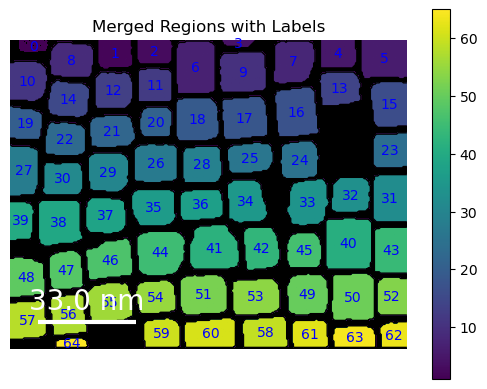

In [20]:
fig

# Overlayed HAADF image with binary mask

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import hyperspy.api as hs
from skimage import measure

# Assuming HAADF and roi are already defined
HAADF_image = HAADF.data

# Merge the segmented regions into a single image
merged_image = np.zeros_like(roi[0].T.data)  # Ensure the base image is the correct size

# Assign unique labels to each region based on their order, starting from 0
for i, region in enumerate(roi):
    # Use the region data as a mask to set values in the merged image
    merged_image[region.data > 0] = i + 1  # Label regions from 1 to n

# Create a HyperSpy signal from the merged image
merged_signal = hs.signals.Signal2D(merged_image)

# Set a fixed figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Display the HAADF image
ax.imshow(HAADF_image, cmap='gray', aspect='auto')

# Overlay the labeled image with transparency
im = ax.imshow(merged_signal.data, cmap='viridis', alpha=0.3, aspect='auto')

# Optionally, add a colorbar to help interpret the labels
fig.colorbar(im, ax=ax)

# Add labels to each region
for i, region in enumerate(roi):
    x, y = np.where(merged_signal.data == i + 1)  # Adjust index for 1-based labels
    if x.size > 0 and y.size > 0:  # Check if the region is not empty
        ax.text(y.mean(), x.mean(), str(i), color='blue', ha='center', va='center', fontsize=10, zorder=3)

# Add black edges around each region
for i in range(1, len(roi) + 1):  # Start from 1 to skip background (0)
    region = merged_signal.data == i
    contours = measure.find_contours(region, 0.5)  # Find contours at the boundary
    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1, zorder=5)  # Draw the contour

# Calculate scale bar length in pixels
pixel_size = HAADF.axes_manager[0].scale  # nm/pixel
desired_scale_bar_length_nm = round((HAADF.data.shape[1] * HAADF.axes_manager[0].scale) / 4, 2)  # nm
scale_bar_length_px = int(desired_scale_bar_length_nm / pixel_size)

# Draw the scale bar on the image
x_start = 20
y_start = HAADF_image.shape[0] - 20  # Adjusted to fit the text above

# Add a black background rectangle for the scale bar
#scale_bar_bg_height = 30  # Height of the background rectangle
#ax.add_patch(plt.Rectangle((x_start, y_start - scale_bar_bg_height), scale_bar_length_px, scale_bar_bg_height,
#                           color='black', zorder=6))

# Draw the scale bar
ax.hlines(y=y_start, xmin=x_start, xmax=x_start + scale_bar_length_px, colors='white', linewidth=3, zorder=7)
# Add text label for the scale bar above the bar
ax.text(x_start + scale_bar_length_px / 2, y_start - 5, f'{desired_scale_bar_length_nm} nm',
        color='white', ha='center', va='bottom', fontsize=20, zorder=7)

# Hide the axis
plt.axis('off')

# Set title and show the plot
ax.set_title('Overlay of Labeled Image on HAADF Image')

# Prevent resizing of the plot with the window
fig.tight_layout(pad=0)
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

# Save the plot and images
# fig.savefig(name + '__Labeled image.png', bbox_inches='tight', pad_inches=0, overwrite=True)
# merged_signal.save(name + '__Binary mask.tif', overwrite=True)
# HAADF.save(name + '__HAADF.tif', overwrite=True)


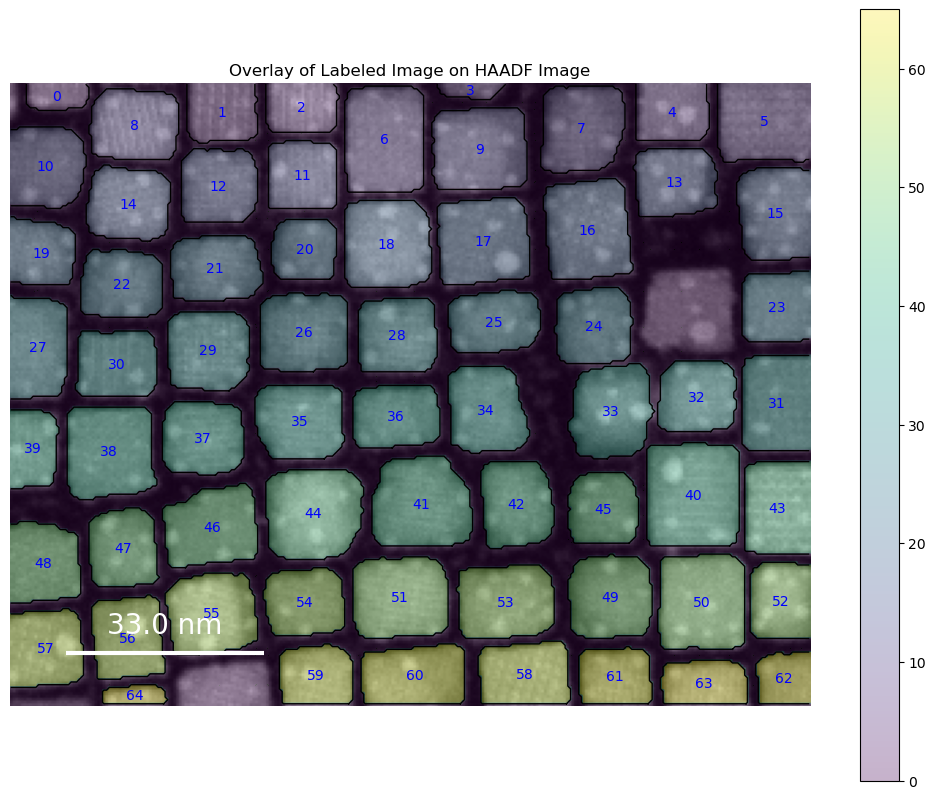

In [22]:
fig

# Colour labeled segmentation

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from skimage import measure
from matplotlib.patches import Rectangle

# Example arrays for demonstration
# Assuming 'HAADF' and 'merged_signal' are Hyperspy Signal2D objects
HAADF_image = HAADF.data  # Replace with your actual image data
merged_signal = np.asarray(merged_signal)  # Convert to NumPy array if it's a memoryview

# Example array for demonstration , this array is used to color label each region, you can obtain the array 
 #based on chemical composition from the exported excel file then paste it here
array = [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1]

# Create a custom colormap based on the binary array
colors = [(0, 0, 0, 0)]  # RGBA for transparent
colors += [('red' if value == 0 else 'green' if value == 1 else 'yellow') for value in array]
cmap = ListedColormap(colors)

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(10, 8))  # Set figure size here

# Display the HAADF image
ax.imshow(HAADF_image, cmap='gray', aspect='auto')

# Overlay the labeled image with custom colors
im = ax.imshow(merged_signal, cmap=cmap, alpha=0.4, aspect='auto', zorder=1)  # Adjust alpha for more/less transparency

# Add a colorbar to help interpret the labels
cbar = fig.colorbar(im, ax=ax, ticks=[i + 0.5 for i in range(len(colors))])
cbar.ax.set_yticklabels(['BG'] + list(range(len(array))))  # Set labels for colorbar, starting with background

# Draw black edges around each region and add labels
for i in range(1, len(array) + 1):  # Start from 1 to skip background (0)
    region = merged_signal == i
    contours = measure.find_contours(region, 0.5)  # Find contours at the boundary

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], color='black', linewidth=1, zorder=2)  # Draw the contour

    # Calculate the center of the region for labeling
    y_coords, x_coords = np.where(region)
    if y_coords.size > 0 and x_coords.size > 0:  # Check if the region is not empty
        # Calculate mean position for label
        y_mean, x_mean = np.mean(y_coords), np.mean(x_coords)
        ax.text(x_mean, y_mean, str(i), color='blue', ha='center', va='center', fontsize=10, weight='bold', zorder=2)

# Calculate scale bar length in pixels
pixel_size = HAADF.axes_manager[0].scale   # nm/pixel
desired_scale_bar_length_nm = round((HAADF.data.shape[1]*HAADF.axes_manager[0].scale)/4,2)  # nm
scale_bar_length_px = int(desired_scale_bar_length_nm / pixel_size)



# Draw the scale bar on the image
x_start = 20
y_start = HAADF_image.shape[0] - 10  # Adjusted to fit the text above

# Draw a black rectangle as the background for the scale bar
#rect_height = 20  # height of the rectangle
#rect = Rectangle((x_start, y_start - rect_height), scale_bar_length_px, rect_height, color='black', zorder=3)
#ax.add_patch(rect)

# Draw the scale bar
ax.hlines(y=y_start, xmin=x_start, xmax=x_start + scale_bar_length_px, colors='white', linewidth=5, zorder=4)
# Add text label for the scale bar above the bar
ax.text(x_start + scale_bar_length_px / 2, y_start - 5, f'{desired_scale_bar_length_nm} nm', color='white', ha='center', va='bottom', fontsize=25, zorder=4)

# Hide the axis
plt.axis('off')

# Set the aspect ratio to be equal
ax.set_aspect('equal', adjustable='box')

# Set title and show the plot
ax.set_title('Labeled HAADF Image with Conditional Colors based on I/Pb atomic concentration ratio: \n red (I/Pb<2.5), green (2.5<I/Pb<3.5), yellow (3.5<I/Pb)')

# Show the plot
plt.show()


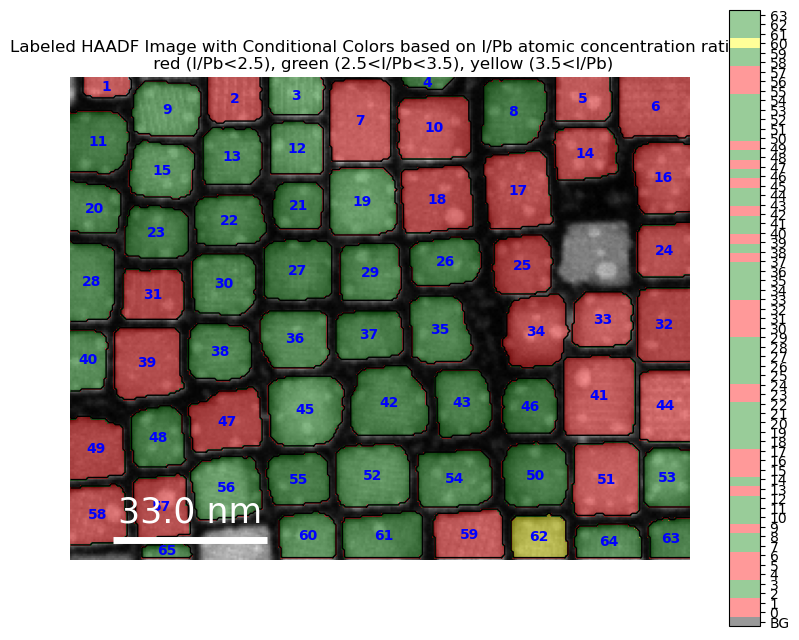

In [24]:
fig